<a href="https://colab.research.google.com/github/AswinAnand66/DA_Python_FreeCodeCamp/blob/main/FreeCodeCamp_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [2]:
cols = ["flength","fWidth","fSize","fConc","fConcl","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/FCC/magic04.data', names= cols)
df.head()

,flength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [4]:
df["class"] = (df["class"] == "g").astype(int)
df[df["class"] == 1]

,flength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
12327,12.8703,11.4444,2.3811,0.7360,0.3805,-15.0946,5.3032,11.6208,21.0120,204.0370,1
12328,26.8595,20.5946,2.8754,0.3438,0.2152,-3.4556,-20.0014,-9.0535,3.9848,205.4980,1
12329,22.0913,10.8949,2.2945,0.5381,0.2919,15.2776,18.2296,7.3975,21.0680,123.2810,1
12330,56.2216,18.7019,2.9297,0.2516,0.1393,96.5758,-41.2969,11.3764,5.9110,197.2090,1


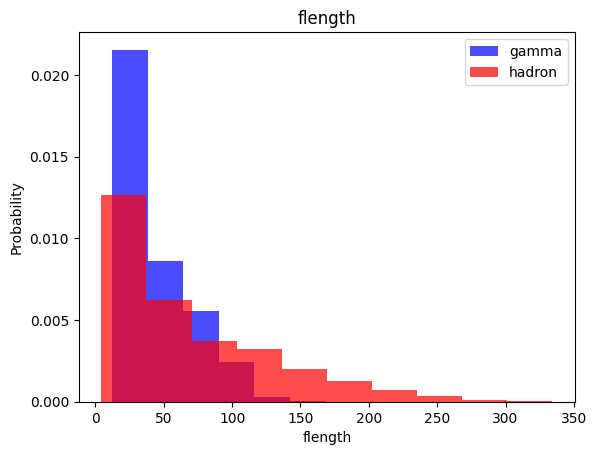

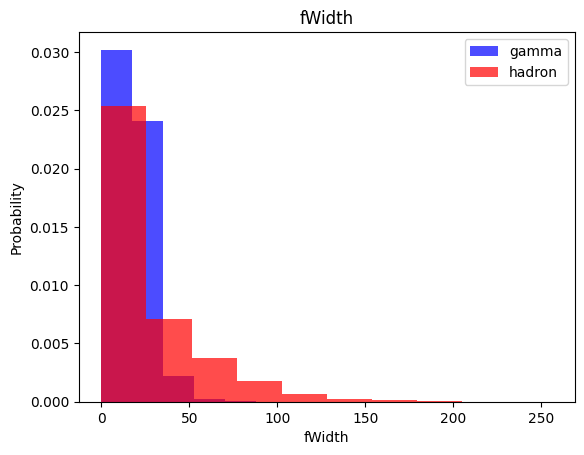

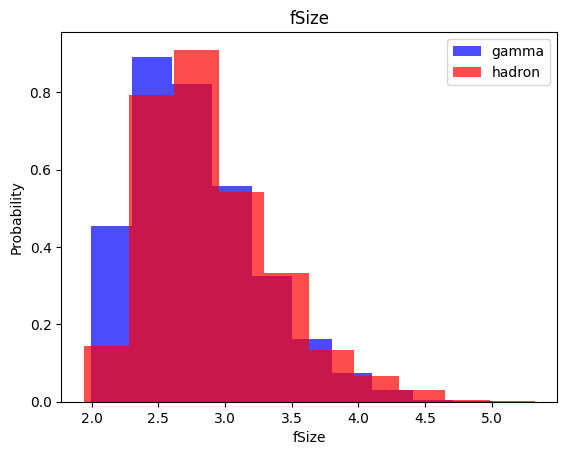

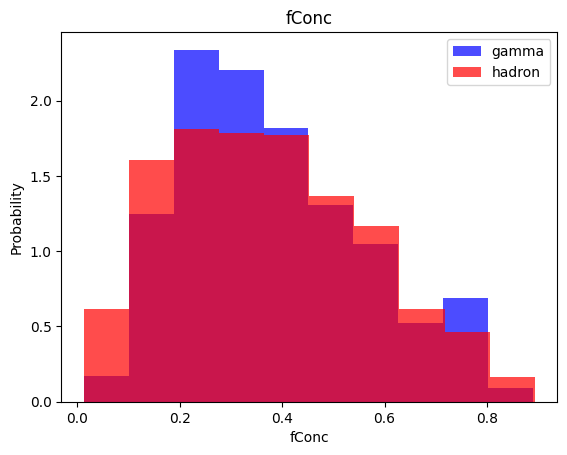

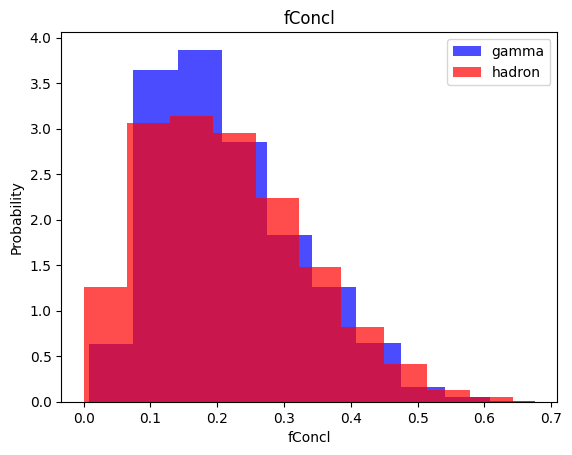

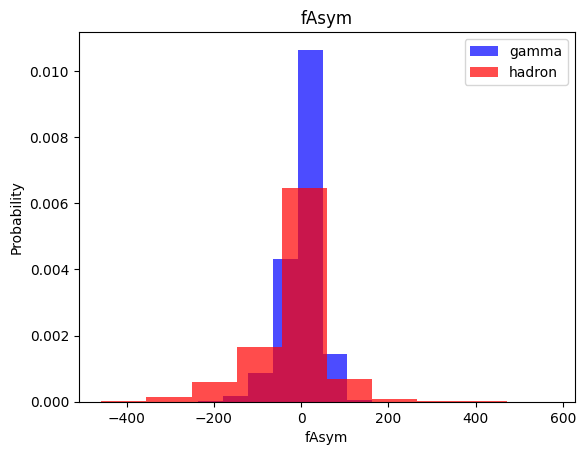

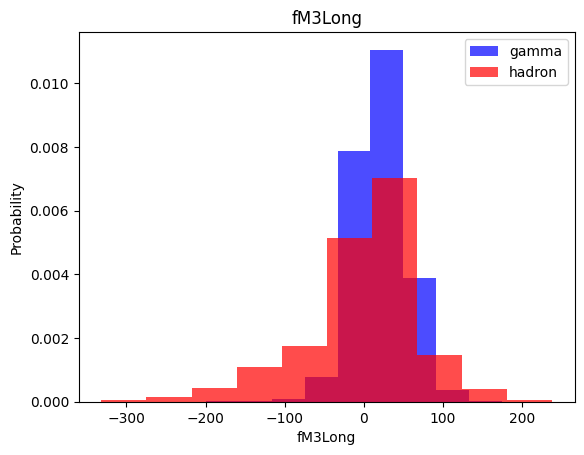

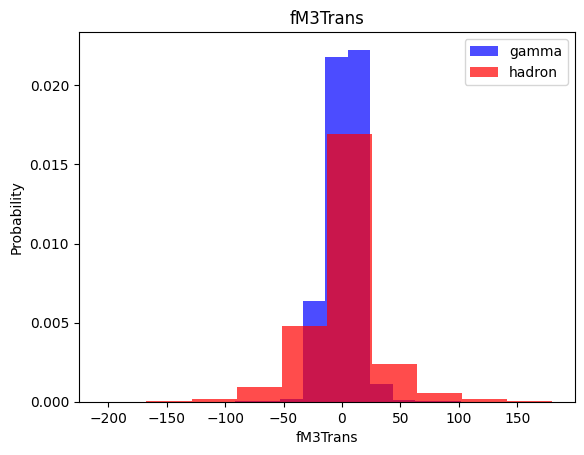

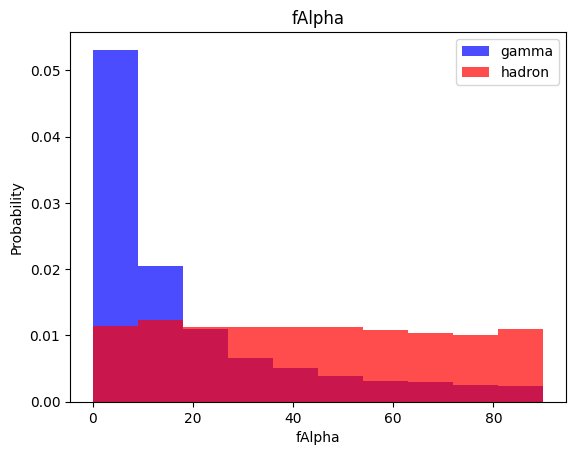

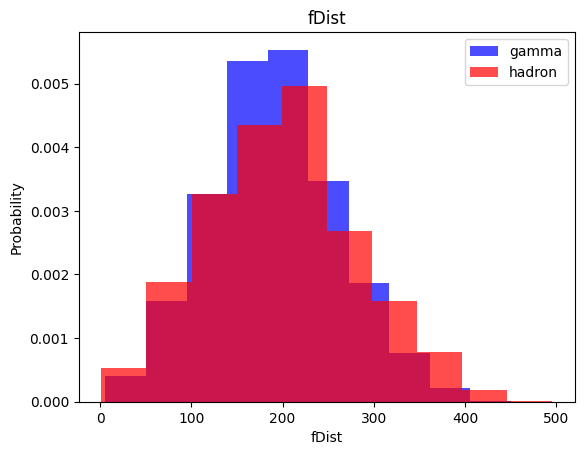

In [5]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


Train, validation, test datasets

In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
#

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [8]:
print(len(train[train['class'] == 1]))
print(len(train[train['class'] == 0]))

7383
4029


In [9]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)


#KNN


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1317
           1       0.84      0.89      0.86      2487

    accuracy                           0.82      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.82      0.81      3804



#Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [12]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))
#

              precision    recall  f1-score   support

           0       0.69      0.43      0.53      1317
           1       0.75      0.90      0.82      2487

    accuracy                           0.74      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.74      0.72      3804



#Logistic Regression


In [13]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [14]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))
#

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1317
           1       0.85      0.83      0.84      2487

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



#SVM

In [15]:
from sklearn.svm import SVC

In [16]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))
#

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1317
           1       0.90      0.90      0.90      2487

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



#Neural Networks

In [23]:
import tensorflow as tf

In [24]:
from re import A
def plot_histroy(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='train')
  ax1.plot(history.history['val_loss'], label='validation')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.grid()

  ax2.plot(history.history['accuracy'], label='train')
  ax2.plot(history.history['val_accuracy'], label='validation')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
#

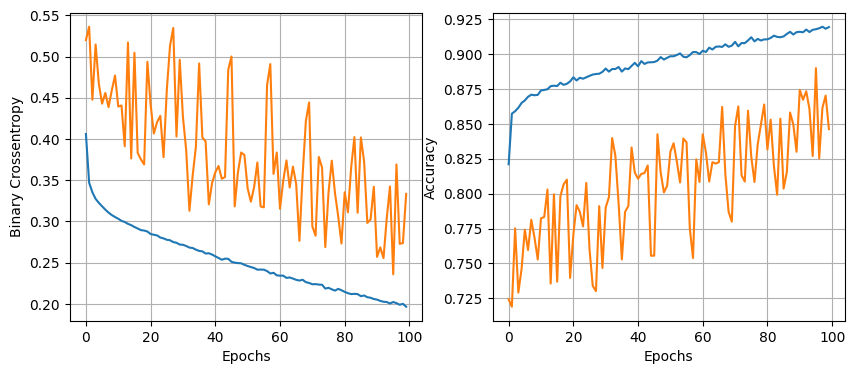

In [38]:
plot_histroy(history)


In [28]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()


In [32]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

  return nn_model, history
#

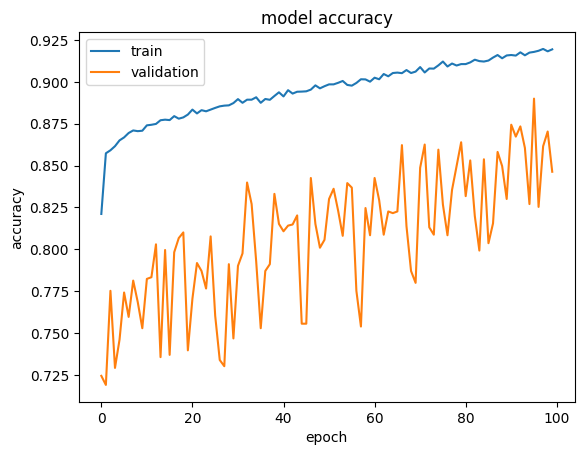

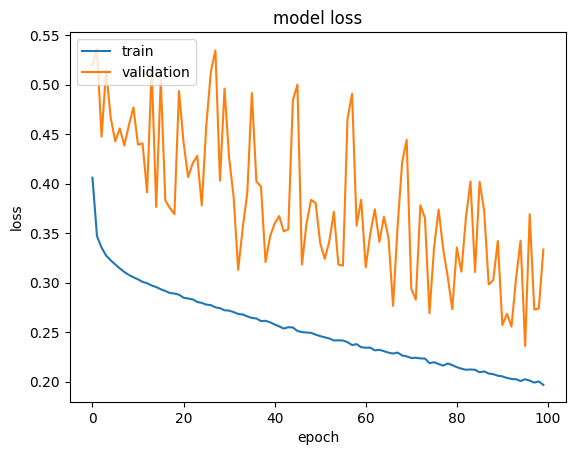

In [33]:
plot_accuracy(history)
plot_loss(history)

16 nodes
16 nodes, dropout 0, lr: 0.1, batch size: 32


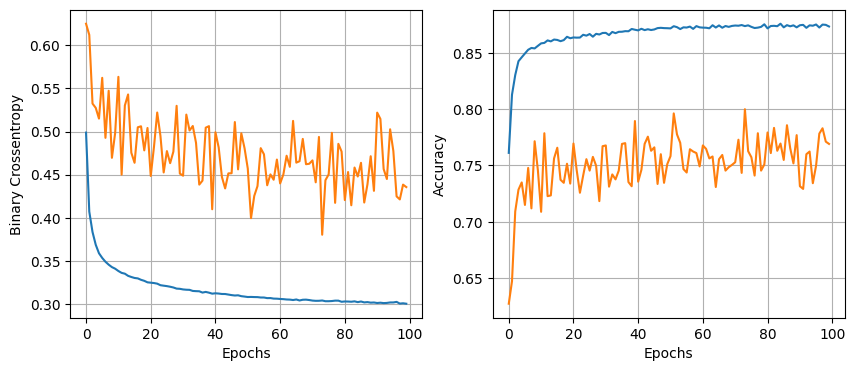

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.3346
Validation loss: 0.3217366337776184, Validation accuracy: 0.8659306168556213
16 nodes, dropout 0, lr: 0.1, batch size: 64


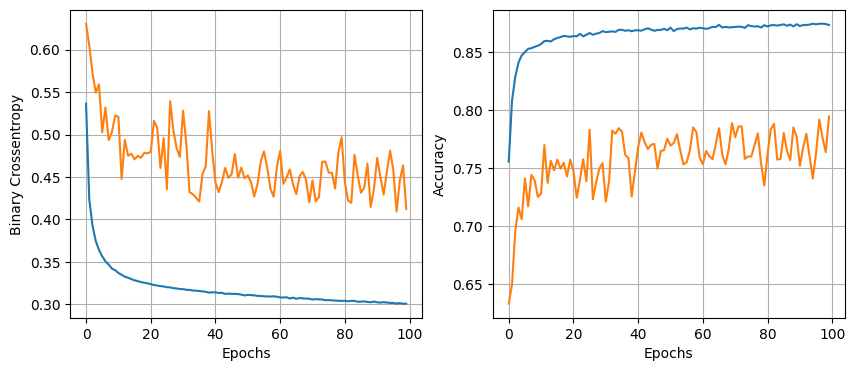

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8609 - loss: 0.3283
Validation loss: 0.3163239061832428, Validation accuracy: 0.8672450184822083
16 nodes, dropout 0, lr: 0.1, batch size: 128


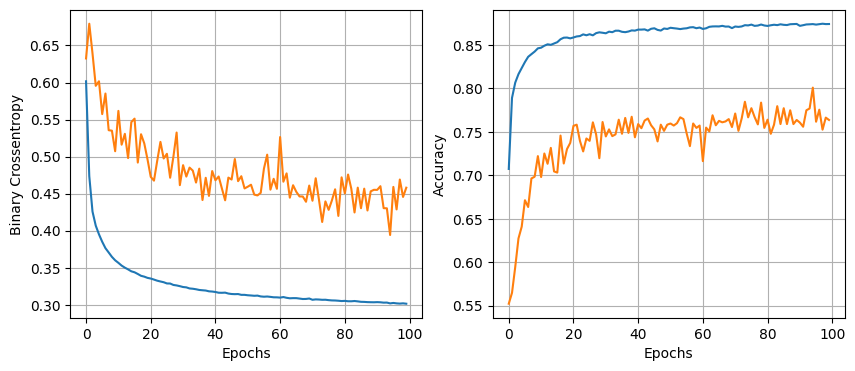

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8560 - loss: 0.3306
Validation loss: 0.31736496090888977, Validation accuracy: 0.8617244958877563
16 nodes, dropout 0, lr: 0.005, batch size: 32


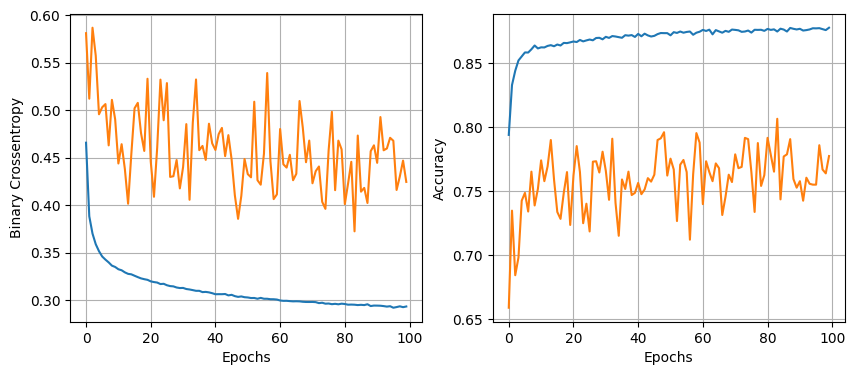

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8671 - loss: 0.3273
Validation loss: 0.3175923526287079, Validation accuracy: 0.8719768524169922
16 nodes, dropout 0, lr: 0.005, batch size: 64


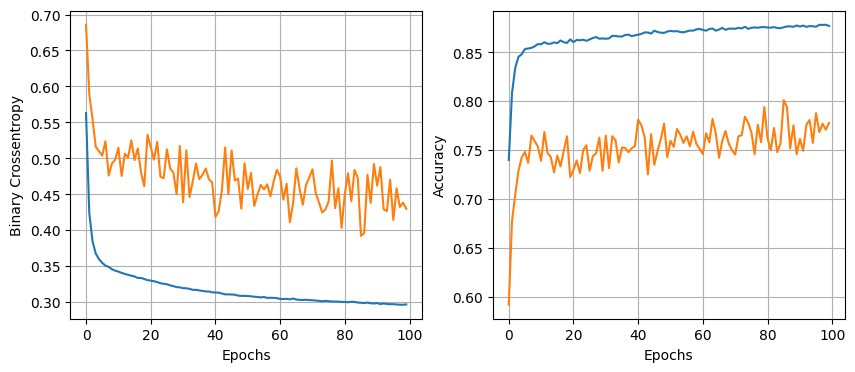

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8651 - loss: 0.3242
Validation loss: 0.31821659207344055, Validation accuracy: 0.8661934733390808
16 nodes, dropout 0, lr: 0.005, batch size: 128


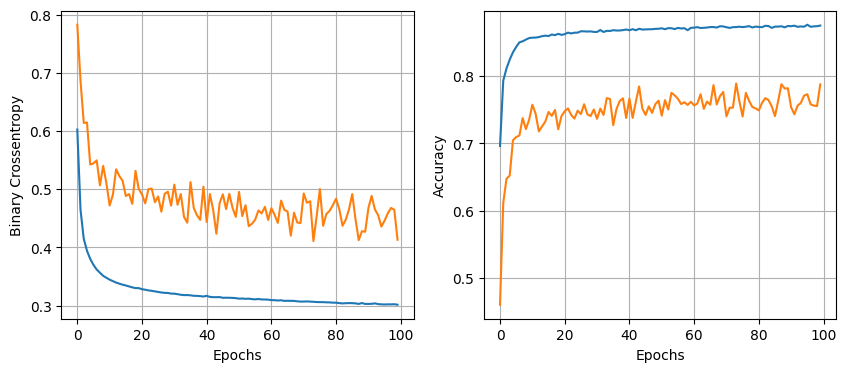

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8665 - loss: 0.3285
Validation loss: 0.3199785649776459, Validation accuracy: 0.8709253668785095
16 nodes, dropout 0, lr: 0.001, batch size: 32


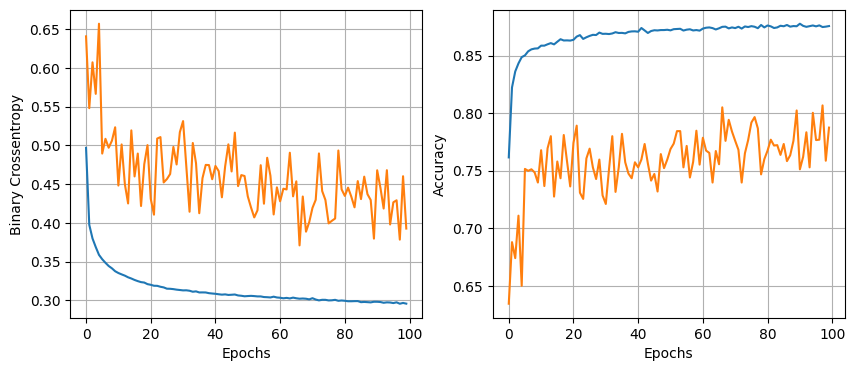

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8716 - loss: 0.3193
Validation loss: 0.31267669796943665, Validation accuracy: 0.8717139959335327
16 nodes, dropout 0, lr: 0.001, batch size: 64


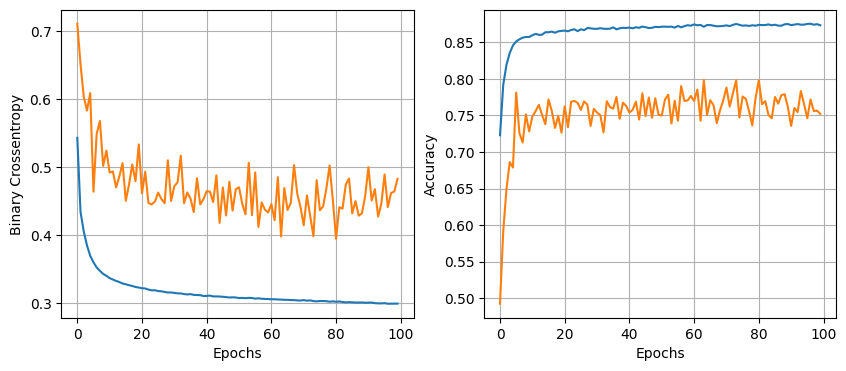

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8649 - loss: 0.3213
Validation loss: 0.3141048848628998, Validation accuracy: 0.8693480491638184
16 nodes, dropout 0, lr: 0.001, batch size: 128


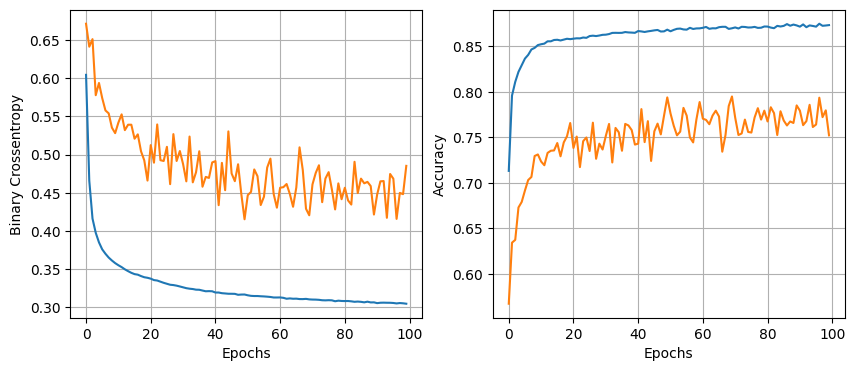

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8592 - loss: 0.3353
Validation loss: 0.3225694000720978, Validation accuracy: 0.8648790717124939
16 nodes, dropout 0.2, lr: 0.1, batch size: 32


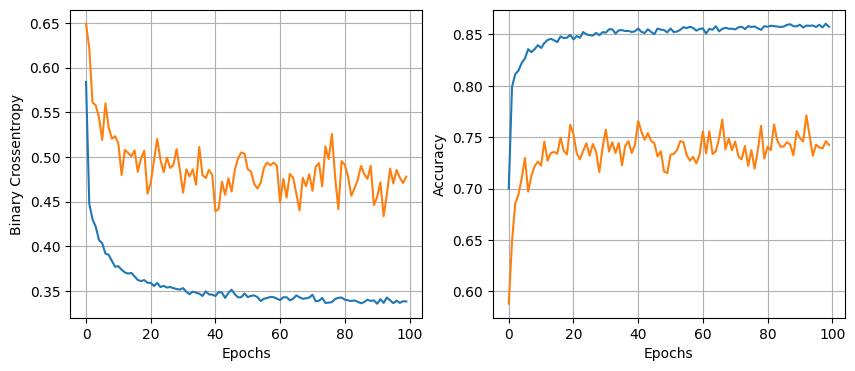

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.3362
Validation loss: 0.32129257917404175, Validation accuracy: 0.8656677007675171
16 nodes, dropout 0.2, lr: 0.1, batch size: 64


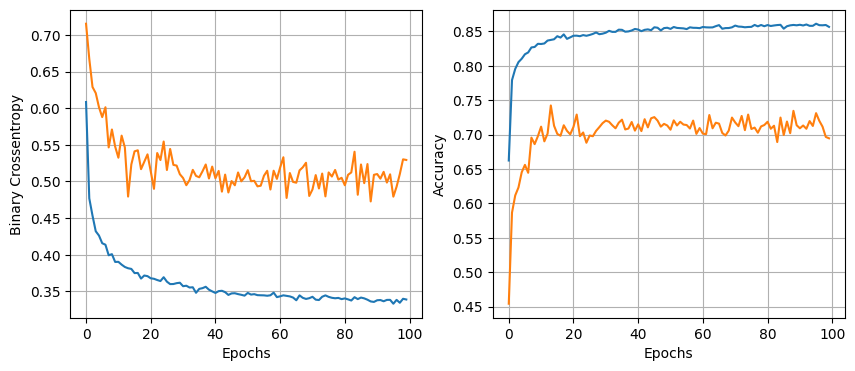

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8596 - loss: 0.3326
Validation loss: 0.32163140177726746, Validation accuracy: 0.8643532991409302
16 nodes, dropout 0.2, lr: 0.1, batch size: 128


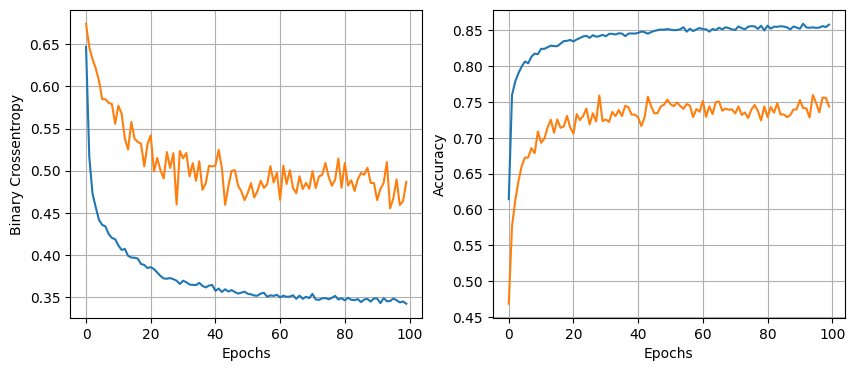

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8576 - loss: 0.3334
Validation loss: 0.3246169090270996, Validation accuracy: 0.8606729507446289
16 nodes, dropout 0.2, lr: 0.005, batch size: 32


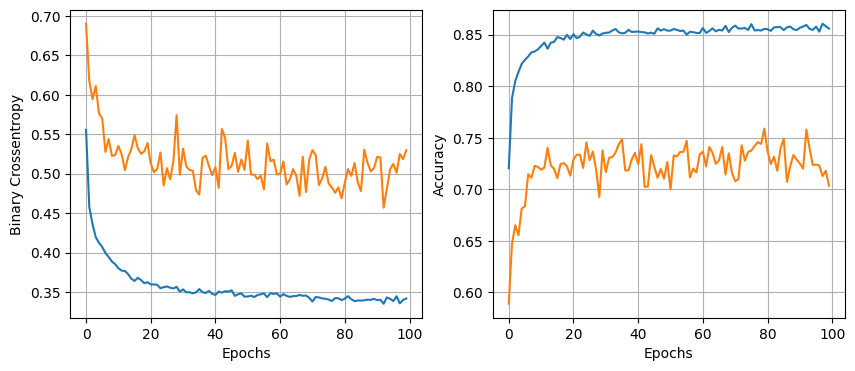

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8585 - loss: 0.3330
Validation loss: 0.3256647288799286, Validation accuracy: 0.8596214652061462
16 nodes, dropout 0.2, lr: 0.005, batch size: 64


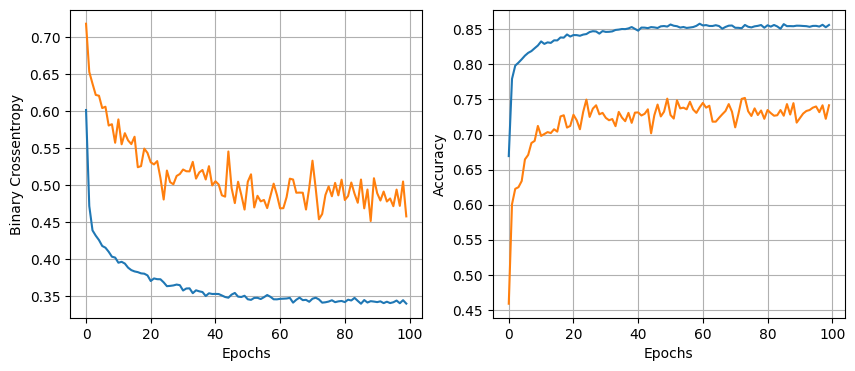

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8594 - loss: 0.3326
Validation loss: 0.3221352696418762, Validation accuracy: 0.8667192459106445
16 nodes, dropout 0.2, lr: 0.005, batch size: 128


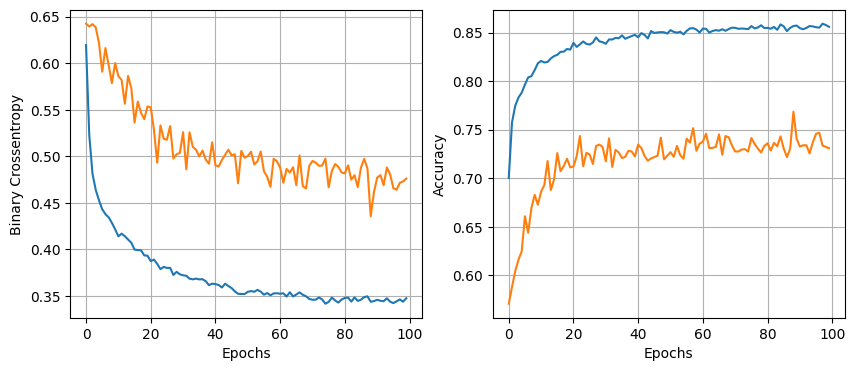

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8612 - loss: 0.3324
Validation loss: 0.32208701968193054, Validation accuracy: 0.8646162152290344
16 nodes, dropout 0.2, lr: 0.001, batch size: 32


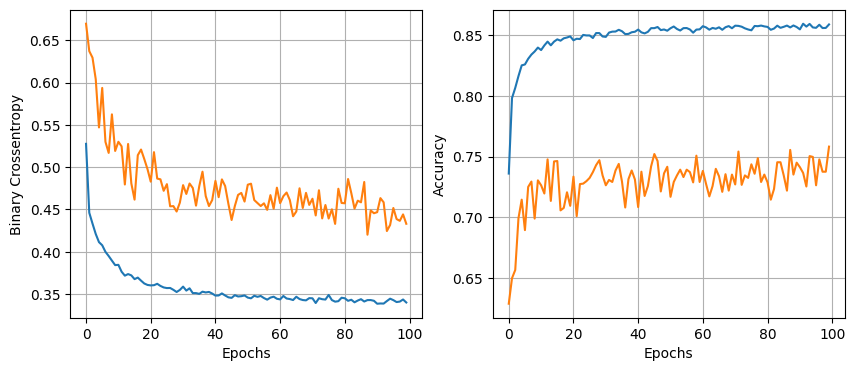

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8596 - loss: 0.3352
Validation loss: 0.3269095718860626, Validation accuracy: 0.8654048442840576
16 nodes, dropout 0.2, lr: 0.001, batch size: 64


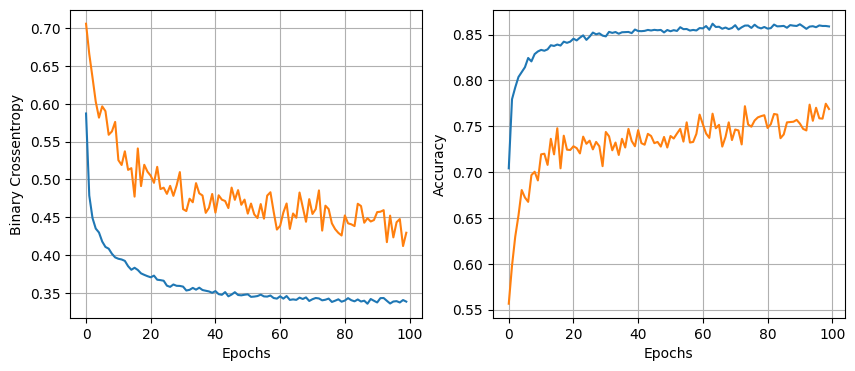

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.3328
Validation loss: 0.3218872845172882, Validation accuracy: 0.8675078749656677
16 nodes, dropout 0.2, lr: 0.001, batch size: 128


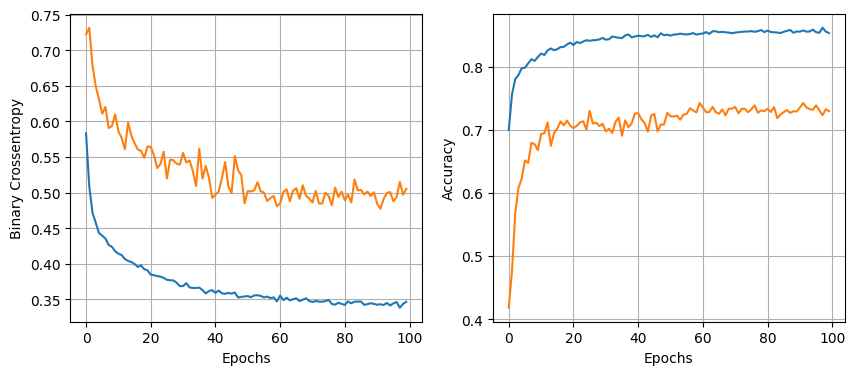

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8642 - loss: 0.3320
Validation loss: 0.3230169415473938, Validation accuracy: 0.8659306168556213
32 nodes
32 nodes, dropout 0, lr: 0.1, batch size: 32


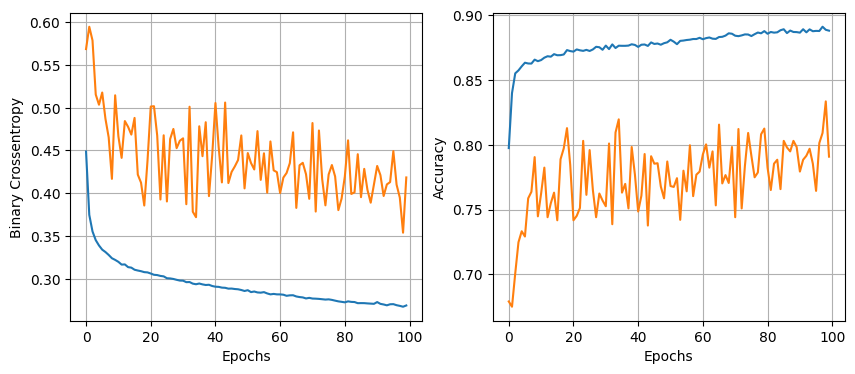

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8629 - loss: 0.3302
Validation loss: 0.31848445534706116, Validation accuracy: 0.8690851926803589
32 nodes, dropout 0, lr: 0.1, batch size: 64


KeyboardInterrupt: 

In [39]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  print(f'{num_nodes} nodes')
  for dropout_prob in [0,0.2]:
    for lr in [0.1,0.005,0.001]:
      for batch_size in [32, 64, 128]:
        print(f'{num_nodes} nodes, dropout {dropout_prob}, lr: {lr}, batch size: {batch_size}')
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        # plot_accuracy(history)
        # plot_loss(history)
        plot_histroy(history)
        val_loss, val_acc = model.evaluate(x_valid, y_valid)
        print(f'Validation loss: {val_loss}, Validation accuracy: {val_acc}')
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model
#

#Linear Regression


In [40]:
print('test')

test
